# MSc Project : analysis 02 complete data

### Setting up the environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
# import pandas as pd
import dask
# from mpl_toolkits.basemap import Basemap
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp 
%matplotlib inline

In [2]:
# from dask.distributed import Client

In [3]:
import sys
sys.path.append('./functions/')

In [4]:
from functions import ccplot, binning, scaling

In [5]:
# import seaborn as sns
# Use seaborn style defaults and set default figure size
# plt.style.use('seaborn-pastel')
# sns.set_theme(style="ticks")
# plt.style.use(['science', 'notebook'])
plt.style.use('tableau-colorblind10')

In [6]:
# Colormap selection
xr.set_options(cmap_divergent='BrBG', cmap_sequential='YlGnBu')

In [7]:
fsize = 15
tsize = 18

tdir = 'in'

major = 5.0
minor = 3.0

# plt.style.use(style)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = 1.4
plt.rcParams['legend.handlelength'] = 0.5

In [8]:
# making a new colomap -> tmap

n = 35
diff = 0.5
cmap = plt.cm.BrBG
cmap2 = plt.cm.RdBu_r
lower = cmap(np.linspace(0, diff, n))
lower2 = cmap2(np.linspace(0, diff, n))
white = np.ones((7, 4))
white2 = np.ones((5, 4))
upper = cmap(np.linspace(1-diff, 1, n))
upper2 = cmap2(np.linspace(1-diff, 1, n))
colors = np.vstack((lower, white, upper))
colors2 = np.vstack((lower2, white2, upper2))
tmap = m.colors.LinearSegmentedColormap.from_list('map_white', colors)
tmap2 = m.colors.LinearSegmentedColormap.from_list('map_white', colors2)

In [9]:
# client = Client(memory_limit='60GB')

### Impoting and preparing data

In [10]:
mfdata_DIR = './data/GPM_lowres_data/*.nc'

# gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=1000, lat=-1, lon=-1), engine='netcdf4', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_dataset('./data/GPM_lowres_data/gpm_2000.nc', chunks={"time":2000})
gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=1000, lat=-1, lon=-1))

In [11]:
# gpm = gpm.unify_chunks()
# gpm.chunks

In [12]:
# precip = regridder(gpm.precipitationCal)

In [13]:
# gpm = gpm.persist()

In [14]:
gpm

<xarray.Dataset>
Dimensions:    (time: 369600, lon: 161, lat: 161)
Coordinates:
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:30:00
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>

In [15]:
precip = gpm.precipCal.resample(time = '1H').sum() / 2 

In [16]:
# precip = precip.resample(time = '12H').sum()

In [17]:
# precip = precip.chunk(dict(time=8000, lat=40, lon=40))

In [18]:
# precip = precip.unify_chunks()
# precip.chunks

In [19]:
precip = precip.chunk(dict(time=1000, lat=-1, lon=-1))

In [20]:
precip

<xarray.DataArray 'precipCal' (time: 184800, lat: 161, lon: 161)>
dask.array<rechunk-merge, shape=(184800, 161, 161), dtype=float32, chunksize=(1000, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
  * lon      (lon) float64 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0

In [21]:
# ax = plt.axes(projection=ccrs.platecarree())
# ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.platecarree())
# precip.isel(time=0).plot.contourf(ax = ax, extend='neither', levels=15)
# ax.coastlines()
# gridliner = ax.gridlines(crs=ccrs.platecarree(), draw_labels=true, linewidth=2, color='gray', alpha=0.1, linestyle='--')
# gridliner.top_labels = false
# gridliner.right_labels = false
# gridliner.ylines = false  # you need false
# gridliner.xlines = false  # you need false

In [22]:
mfdata_DIR2 = './data/era_data/*.nc'

# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40), engine='netcdf4', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40))

In [23]:
# era = era.unify_chunks()
# era.chunks
era = era.sel(expver=1, drop=True)
era = era.transpose('time', 'latitude', 'longitude')
era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})
era = era.rename({'longitude':'lon', 'latitude':'lat'})
era = era.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 161, time: 184800)
Coordinates:
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    u10      (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    v10      (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    d2m      (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    t2m      (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    mx2t     (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    mn2t     (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
    sst      (time, lat, lon) float32 dask.array<chunksize=(352, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-02 12:58:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [24]:
mfdata_DIR3 = './data/era_data2/*.nc'

# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40), engine='netcdf4', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
era2 = xr.open_mfdataset(mfdata_DIR3, chunks=dict(time=-1, lat=40, lon=40))

In [25]:
# era2 = era2.sel(expver=1, drop=True)
era2 = era2.transpose('time', 'latitude', 'longitude')
era2 = era2.rename_dims({'longitude':'lon', 'latitude':'lat'})
era2 = era2.rename({'longitude':'lon', 'latitude':'lat'})
era2 = era2.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era2

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 161, time: 184800)
Coordinates:
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    e        (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
    vimd     (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-04 12:51:49 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [26]:
t2m = era.t2m
d2m = era.d2m
vimd = era2.vimd

In [27]:
t2m = t2m.chunk(dict(time=1000, lat=-1, lon=-1))
d2m = d2m.chunk(dict(time=1000, lat=-1, lon=-1))
vimd = vimd.chunk(dict(time=1000, lat=-1, lon=-1))

In [28]:
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([59.9, 100.1, 0, 40.1], crs=ccrs.PlateCarree())
# t2m.isel(time=0).plot.contourf(ax = ax, cmap='turbo', extend='neither', levels=15)
# ax.coastlines()
# gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--')
# gridliner.top_labels = False
# gridliner.right_labels = False
# gridliner.ylines = False  # you need False
# gridliner.xlines = False  # you need False

In [29]:
# ds_comb = xr.merge([precip, t2m, d2m])

In [30]:
# del precip
# del t2m
# del d2m
# del gpm
# del era

In [31]:
# ds_comb

**Gettig the pressure data**

## Binning

In [32]:
# # Plotting the region
# # fig = plt.figure(figsize=(6,6))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([59.9, 100.1, -0.1, 40.1], crs=ccrs.PlateCarree())
# # marking wcgw
# ax.plot([72, 72], [8, 18.75], 'k', ls = '--', lw = 0.9)
# ax.plot([77.75, 77.75], [8, 18.75], 'k', ls = '--', lw = 0.9)
# ax.plot([72, 77.75], [8, 8], 'k', ls = '--', lw=0.9)
# ax.plot([72, 77.75], [18.75, 18.75], 'k', ls = '--', lw = 0.9)
# # marking sip region
# ax.plot([77.5, 77.5], [8, 18.75], 'k', ls = '--', lw = 0.9)
# ax.plot([84, 84], [8, 18.75], 'k', ls = '--', lw = 0.9)
# ax.plot([77.75, 84], [8, 8], 'k', ls = '--', lw=0.9)
# ax.plot([77.75, 84], [18.75, 18.75], 'k', ls = '--', lw = 0.9)
# # marking cir region
# ax.plot([76, 76], [19, 26], 'k', ls = '--', lw = 0.9)
# ax.plot([86, 86], [19, 26], 'k', ls = '--', lw = 0.9)
# ax.plot([76, 86], [19, 19], 'k', ls = '--', lw=0.9)
# ax.plot([76, 86], [26, 26], 'k', ls = '--', lw = 0.9)
# precip.sel(time="2019-07-20 09:00:00").plot.contourf(ax = ax, extend='neither', levels=15)
# # ax.coastlines(alpha=0.7)
# gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
# # ax.add_feature(cfeature.BORDERS, alpha=0.7)
# ax.add_feature(cfeature.COASTLINE, alpha=1.0)
# gridliner.top_labels = False
# gridliner.right_labels = False
# gridliner.ylines = False  # you need False
# gridliner.xlines = False  # you need False
# # ax.tick_params(axis='both', labelsize=12)
# plt.savefig('./images/region.pdf', dpi=300)

In [33]:
ds_comb = xr.merge([precip, t2m, d2m, vimd])

In [34]:
ds_comb

<xarray.Dataset>
Dimensions:    (lon: 161, lat: 161, time: 184800)
Coordinates:
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    t2m        (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    d2m        (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    vimd       (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>

In [35]:
# ds_comb_loaded = ds_comb.load()

In [36]:
# ds_comb_loaded.to_netcdf('./data/combined/full_data_combined.nc')

In [37]:
mon = [6,7,8,9]
premon = [3,4,5]
postmon = [10,11,12]
wint = [1,2]

In [38]:
# for monsoon season only first

In [39]:
ds_comb_mon = xr.concat([list(ds_comb.groupby('time.month'))[i-1][1] for i in mon], dim='time')

In [40]:
ds_comb_mon = ds_comb_mon.sortby('time.year')

In [41]:
ds_comb_mon

<xarray.Dataset>
Dimensions:    (lon: 161, lat: 161, time: 62208)
Coordinates:
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(720, 161, 161), meta=np.ndarray>
    t2m        (time, lat, lon) float32 dask.array<chunksize=(720, 161, 161), meta=np.ndarray>
    d2m        (time, lat, lon) float32 dask.array<chunksize=(720, 161, 161), meta=np.ndarray>
    vimd       (time, lat, lon) float32 dask.array<chunksize=(720, 161, 161), meta=np.ndarray>

### analysing

In [42]:
precip = ds_comb_mon.precipCal
t2m = ds_comb_mon.t2m
d2m = ds_comb_mon.d2m
vimd = ds_comb_mon.vimd

In [43]:
precip_daily_rate = precip[::-1].rolling(time=24).sum()[::-1]
# precip_daily_rate = precip

In [44]:
# Set values less than 0.1 mm/hr to nan

# precip = xr.where(precip_daily_rate > 1, precip, np.nan).chunk(dict(time=-1, lat=40, lon=40))
# # precip = xr.where(precip > 0.1, precip, np.nan).chunk(dict(time=-1, lat=40, lon=40))
# precip = precip.where(precip > 0).chunk(dict(time=-1, lat=40, lon=40))
# t2m = t2m.where(precip != np.nan).chunk(dict(time=-1, lat=40, lon=40))
# d2m = d2m.where(precip != np.nan).chunk(dict(time=-1, lat=40, lon=40))

precip = xr.where(precip_daily_rate > 1, precip, np.nan)
# precip = precip.where(precip > 0)
t2m = t2m.where(precip != np.nan)
d2m = d2m.where(precip != np.nan)
vimd = vimd.where(precip != np.nan)

In [45]:
# ind_precip = precip.chunk(dict(time=-1, lat=40, lon=40))
# ind_t2m = t2m.chunk(dict(time=-1, lat=40, lon=40))
# ind_d2m = d2m.chunk(dict(time=-1, lat=40, lon=40))

### Spatial

In [46]:
ind_precip = precip.chunk(dict(time=-1, lat=-1, lon=-1))
ind_t2m = t2m.chunk(dict(time=-1, lat=-1, lon=-1))
ind_d2m = d2m.chunk(dict(time=-1, lat=-1, lon=-1))
ind_vimd = vimd.chunk(dict(time=-1, lat=-1, lon=-1))

In [47]:
# ccscale95_t2m_slope, ccscale95_t2m_p, ccscale95_d2m_slope, ccscale95_d2m_p  = binning.get_binned_3d(ind_precip, ind_t2m, ind_d2m, percentile_val=0.95, bin_nr=20)

In [48]:
ind_precip_loaded = ind_precip.load()
ind_t2m_loaded = ind_t2m.load()
ind_d2m_loaded = ind_d2m.load()
ind_vimd_loaded = ind_vimd.load()

In [52]:
# import numpy as np
# import matplotlib.pyplot as plt
# import xarray as xr
from scipy import stats

# Utility function

# util function to determing the number of bins
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x, axis= None))

# No longer required
# def get_mids(x):
#     bin_mids = []
#     for i in range(0, len(x)-1):
#         bin_mid = (x[i] + x[i + 1])*0.5
#         bin_mids.append(bin_mid)

#     return np.array(bin_mids)

def get_res(x, y):
    # if np.isnan(np.sum(y)):
    #     slope, intercept, r, p, se = stats.linregress(x, y)
    # else:
    slope, _, _, p, _ = stats.linregress(x, np.log(y))

    return slope, p


# def binned_statistic(x, y, bins):
#     xx = stats.binned_statistic(x, x, statistic="mean", bins=bins).statistic
#     xy = stats.binned_statistic(x, y, statistic=get_quant, bins=bins).statistic

#     slope, r = get_res(xx, xy)
#     return slope, r

#-----------------------------------------------------#

# Using functions

# ---------- 2d functions ------------

# # get binned data
# def get_binned(precip_da, temp_da, percentile_val = 0.99, bins = None, bin_nr = 12):
#     # Getting the equal frequency bins
#     if bins == None:
#         bins = equalObs(temp_da, bin_nr)
#     else:
#         bins = np.array(bins)

#     # group the precipitation data according to the bins of temperature data
#     binned_precip = precip_da.groupby_bins(temp_da, bins, include_lowest=True, precision=10).quantile(percentile_val, interpolation = 'midpoint')
#     # group the temperature data by temperature bins and take mean of each bin
#     mean_temp = temp_da.groupby_bins(temp_da, bins, include_lowest=True, precision=10).mean(dim="time")
#     # return them
#     return binned_precip, mean_temp

# def get_binned_alter(precip, temp, percentile_val = 0.99, bins = None, bin_nr = 12):
#     # Getting the equal frequency bins
#     if bins == None:
#         bins = equalObs(temp, bin_nr)
#     else:
#         bins = np.array(bins)

#     # group the precipitation data according to the bins of temperature data
#     binned_precip = precip.groupby_bins(temp, bins, include_lowest=True, precision=10).quantile(percentile_val, interpolation = 'midpoint')
#     # group the temperature data by temperature bins and take mean of each bin
#     mean_temp = temp.groupby_bins(temp, bins, include_lowest=True, precision=10).mean(dim="time")
#     # return them
#     return binned_precip, mean_temp

# ---------- 3d functions ------------

def get_binned_3d(precip_da, t2m_da, d2m_da, vimd_da, bin_nr = 12):
    print("Starting the binning process ...")

    print("converting data-arrays to numpy arrays ...")
    # convert temperature data to numpy array
    t2m = t2m_da.to_numpy()
    d2m = d2m_da.to_numpy()
    precip = precip_da.to_numpy()
    vimd = vimd_da.to_numpy()

    print("Getting freq bins ...")

    # get the equal freq. bins from the temperature data
    # bins_t2m = np.apply_along_axis(equalObs, 0, t2m_da, bin_nr)
    # bins_d2m = np.apply_along_axis(equalObs, 0, d2m_da, bin_nr)

    xrange = len(t2m_da[0])
    yrange = len(t2m_da[0][0])

    print("Done, now initializing zero arrays ...")
    # initialising the for loop by making zeros array for t2m and d2m to mutate
    slope_t2m_95 = np.empty((xrange, yrange))
    p_t2m_95 = np.empty((xrange, yrange))
    slope_t2m_50 = np.empty((xrange, yrange))
    p_t2m_50 = np.empty((xrange, yrange))
    slope_d2m_95 = np.empty((xrange, yrange))
    p_d2m_95 = np.empty((xrange, yrange))
    slope_d2m_50 = np.empty((xrange, yrange))
    p_d2m_50 = np.empty((xrange, yrange))
    slope_vimd_t2m = np.empty((xrange, yrange))
    p_vimd_t2m = np.empty((xrange, yrange))
    slope_vimd_d2m = np.empty((xrange, yrange))
    p_vimd_d2m = np.empty((xrange, yrange))

    print("Starting the loop ...")

    # starting loop
    for lat in range(xrange):
        for lon in range(yrange):
            bins_t2m = equalObs(np.squeeze(t2m_da[:, lat, lon]), bin_nr)
            bins_d2m = equalObs(np.squeeze(d2m_da[:, lat, lon]), bin_nr)
            # group the precipitation data according to the bins of temperature data
            grouped_precip_t2m = precip_da.isel(lat = lat, lon = lon).groupby_bins(t2m_da.isel(lat = lat, lon = lon), bins_t2m, include_lowest=True, precision=10)
            grouped_precip_d2m = precip_da.isel(lat = lat, lon = lon).groupby_bins(d2m_da.isel(lat = lat, lon = lon), bins_d2m, include_lowest=True, precision=10)
            precip_t2m_95 = grouped_precip_t2m.quantile(0.95, interpolation='midpoint')
            precip_t2m_50 = grouped_precip_t2m.quantile(0.50, interpolation='midpoint')
            precip_d2m_95 = grouped_precip_d2m.quantile(0.95, interpolation='midpoint')
            precip_d2m_50 = grouped_precip_d2m.quantile(0.50, interpolation='midpoint')

            # group the temperature data by temperature bins and take mean of each bin
            mean_t2m = t2m_da.isel(lat = lat, lon = lon).groupby_bins(t2m_da.isel(lat = lat, lon = lon), bins_t2m, include_lowest=True, precision=10).mean(dim='time')
            mean_d2m = d2m_da.isel(lat = lat, lon = lon).groupby_bins(d2m_da.isel(lat = lat, lon = lon), bins_d2m, include_lowest=True, precision=10).mean(dim='time')
            mean_vimd_t2m = vimd_da.isel(lat = lat, lon = lon).groupby_bins(t2m_da.isel(lat = lat, lon = lon), bins_t2m, include_lowest=True, precision=10).mean(dim='time')
            mean_vimd_d2m = vimd_da.isel(lat = lat, lon = lon).groupby_bins(d2m_da.isel(lat = lat, lon = lon), bins_d2m, include_lowest=True, precision=10).mean(dim='time')

            # convert to numpy_array()
            # precip_t2m = precip_t2m.to_numpy()
            # precip_d2m = precip_d2m.to_numpy()
            # mean_t2m = mean_t2m.to_numpy()
            # mean_d2m = mean_d2m.to_numpy()

            # idx_t2m = np.argwhere(np.isnan(precip_t2m))
            # idx_d2m = np.argwhere(np.isnan(precip_d2m))

            # precip_t2m = np.delete(precip_t2m, idx_t2m)
            # precip_d2m = np.delete(precip_d2m, idx_d2m)

            # mean_t2m = np.delete(mean_t2m, idx_t2m)
            # mean_d2m = np.delete(mean_d2m, idx_d2m)

            slope_t2m_95[lat, lon], p_t2m_95[lat, lon] = get_res(mean_t2m, precip_t2m_95)
            slope_t2m_50[lat, lon], p_t2m_50[lat, lon] = get_res(mean_t2m, precip_t2m_50)
            slope_d2m_95[lat, lon], p_d2m_95[lat, lon] = get_res(mean_d2m, precip_d2m_95)
            slope_d2m_50[lat, lon], p_d2m_50[lat, lon] = get_res(mean_d2m, precip_d2m_50)
            slope_vimd_t2m[lat, lon], p_vimd_t2m[lat, lon] = get_res(mean_t2m, mean_vimd_t2m)
            slope_vimd_d2m[lat, lon], p_vimd_d2m[lat, lon] = get_res(mean_d2m, mean_vimd_d2m)

#             slope_t2m[lat, lon] = slope_t2m
#             p_t2m[lat, lon] = p_t2m

#             slope_d2m[lat, lon] = slope_d2m
#             p_d2m[lat, lon] = p_d2m

            print(f"Completed {lat+1}/{xrange} lat and {lon+1}/{yrange} lon", end="\r")

    # print("transferring the data to data-array format ...")

    # ccscale_t2m_slope = xr.DataArray(slope_t2m, dims=("lat", "lon"), coords={"lat": precip_da.coords['lat'], "lon": precip_da.coords['lon']}, attrs=dict(description="C-C scale", units="degC$^{-1}$"))

    # ccscale_t2m_r = xr.DataArray(binned_ds_sig_t2m, dims=("lat", "lon"), coords={"lat": precip_da.coords['lat'], "lon": precip_da.coords['lon']}, attrs=dict(description="C-C scale", units="degC$^{-1}$"))

    # ccscale_d2m_slope = xr.DataArray(binned_ds_d2m, dims=("lat", "lon"), coords={"lat": precip_da.coords['lat'], "lon": precip_da.coords['lon']}, attrs=dict(description="C-C scale", units="degC$^{-1}$"))

    # ccscale_d2m_r = xr.DataArray(binned_ds_sig_d2m, dims=("lat", "lon"), coords={"lat": precip_da.coords['lat'], "lon": precip_da.coords['lon']}, attrs=dict(description="C-C scale", units="degC$^{-1}$"))

    print("Done, now writing.")

    return slope_t2m_95, p_t2m_95, slope_d2m_95, p_d2m_95, slope_t2m_50, p_t2m_50, slope_d2m_50, p_d2m_50, slope_vimd_t2m, p_vimd_t2m, slope_vimd_d2m, p_vimd_d2m

    print("Complete")

# # # trying an alternate function for binning
# def get_binned_3d_alter(precip, t2m, d2m, percentile_val=0.95, bin_nr = 12):
#     """
#     The input arrays must be numpy arrays and not dataarrays
#     """
#     print("Starting the binning process ...")
#     print("Getting the equal freq bins ...")
#     # get the equal frequency bins
#     # bins_t2m = np.apply_along_axis(equalObs, 0, t2m, bin_nr)
#     # bins_d2m = np.apply_along_axis(equalObs, 0, d2m, bin_nr)

#     # set the range for the loop
#     xrange = len(t2m[0])
#     yrange = len(t2m[0][0])

#     print("Inititalising the arrays ...")
#     # set the empty arrays to mutate
#     slope_t2m = np.empty((xrange, yrange))
#     slope_d2m = np.empty((xrange, yrange))
#     p_t2m = np.empty((xrange, yrange))
#     p_d2m = np.empty((xrange, yrange))

#     # defnining inner function to get right quantile
#     def get_quant(x):
#         return np.quantile(x, percentile_val, axis=None, out=None, overwrite_input=False, keepdims=True)

#     print("Done, now starting the loop ...")
#     for lat in range(xrange):
#         for lon in range(yrange):
#             bins_t2m = equalObs(np.squeeze(t2m[:,lat,lon]), bin_nr)
#             bins_d2m = equalObs(np.squeeze(d2m[:,lat,lon]), bin_nr)
#             p95_t2m = stats.binned_statistic(np.squeeze(t2m[:,lat,lon]), np.squeeze(precip[:,lat,lon]), statistic=get_quant, bins = bins_t2m).statistic
#             p95_d2m = stats.binned_statistic(np.squeeze(d2m[:,lat,lon]), np.squeeze(precip[:,lat,lon]), statistic=get_quant, bins = bins_d2m).statistic
#             mean_t2m = stats.binned_statistic(np.squeeze(t2m[:,lat,lon]), np.squeeze(t2m[:,lat,lon]), statistic='mean', bins = bins_t2m).statistic
#             mean_d2m = stats.binned_statistic(np.squeeze(d2m[:,lat,lon]), np.squeeze(d2m[:,lat,lon]), statistic='mean', bins = bins_d2m).statistic

#             slope_t2m[lat,lon], p_t2m[lat, lon] = get_res(mean_t2m, p95_t2m)
#             slope_d2m[lat,lon], p_d2m[lat, lon] = get_res(mean_d2m, p95_d2m)

#             print(f"Completed {lat}/{xrange} lat and {lon}/{yrange} lon")

#     print("Done, now returning.")

#     return slope_t2m, p_t2m, slope_d2m, p_d2m

In [54]:
t2m_slope95, t2m_p95, d2m_slope95, d2m_p95, t2m_slope50, t2m_p50, d2m_slope50, d2m_p50, vimd_t2m, p_vimd_t2m, vimd_d2m, p_vimd_d2m  = get_binned_3d(ind_precip_loaded, ind_t2m_loaded, ind_d2m_loaded, ind_vimd_loaded bin_nr=20)

Starting the binning process ...
converting data-arrays to numpy arrays ...
Getting freq bins ...
Done, now initializing zero arrays ...
Starting the loop ...


C:\Users\Dr.NKV\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Dr.NKV\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Dr.NKV\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Dr.NKV\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Dr.NKV\miniconda3\lib\site-packages\xarray\core\computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


C:\Users\Dr.NKV\miniconda3\lib\site-packages\xarray\core\computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


KeyboardInterrupt: 

In [ ]:
# !date

In [55]:
t2m_slope_da95 = xr.DataArray(t2m_slope95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

d2m_slope_da95 = xr.DataArray(d2m_slope95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

t2m_p_da95 = xr.DataArray(t2m_p95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_p_da95 = xr.DataArray(d2m_p95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [56]:
t2m_slope_da50 = xr.DataArray(t2m_slope50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

d2m_slope_da50 = xr.DataArray(d2m_slope50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

t2m_p_da50 = xr.DataArray(t2m_p50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_p_da50 = xr.DataArray(d2m_p50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [57]:
t2m_vimd = xr.DataArray(vimd_t2m, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_vimd = xr.DataArray(vimd_d2m, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

t2m_p_vimd = xr.DataArray(p_vimd_t2m, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_p_vimd = xr.DataArray(p_vimd_d2m, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [58]:
t2m_slope_da95.isnull().sum()

<xarray.DataArray ()>
array(1150)

In [58]:
t2m_slope_da95.to_netcdf('./data/results/3H/full95/t2m_slope.nc')
d2m_slope_da95.to_netcdf('./data/results/3H/full95/d2m_slope.nc')
t2m_p_da95.to_netcdf('./data/results/3H/full95/t2m_p.nc')
d2m_p_da95.to_netcdf('./data/results/3H/full95/d2m_p.nc')

In [59]:
t2m_slope_da50.to_netcdf('./data/results/3H/full50/t2m_slope.nc')
d2m_slope_da50.to_netcdf('./data/results/3H/full50/d2m_slope.nc')
t2m_p_da50.to_netcdf('./data/results/3H/full50/t2m_p.nc') 
d2m_p_da50.to_netcdf('./data/results/3H/full50/d2m_p.nc')

In [60]:
# ccscale50_t2m_slope, ccscale50_t2m_p, ccscale50_d2m_slope, ccscale50_d2m_p  = binning.get_binned_3d(ind_precip, ind_t2m, ind_d2m, percentile_val=0.50, bin_nr=20)


## Plotting

In [63]:
# Plotting function for 3d binning plot
def plot_3d(slope_da, p_da, extent_list, title, threshold_sig=0.001, marker_size=2, **kwargs):
    """
    Function to plot the output of binning 3d function
    -----
    inputs are -
    slope_da : datarray containing slope
    p_da : datarray containing R^2 values for goodness of fit
    title : The title of the output plot
    extent_list : [59.9, 100.1, -0.1, 40.1]
    """
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(extent_list, crs=ccrs.PlateCarree())
    slope_da.plot.contourf(ax = ax, cbar_kwargs={"label":"C-C scale dP(%)/$^{o}$C$^{-1}$"}, **kwargs)
    # (100*(np.exp(slope_da) - 1)).plot.pcolormesh(ax = ax, cbar_kwargs={"label":"C-C scale"}, **kwargs)
    x, y = np.meshgrid(slope_da.coords['lon'], slope_da.coords['lat'])
    plt.scatter(x[(np.abs(p_da.to_numpy()) < threshold_sig)],y[(np.abs(p_da.to_numpy()) < threshold_sig)], marker='D', color = 'k', s=marker_size)
    gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
    # ax.coastlines(alpha=0.7)
    ax.add_feature(cfeature.BORDERS, alpha=1.0, lw = 0.2)
    ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw = 0.5)
    gridliner.top_labels = False
    gridliner.right_labels = False
    gridliner.ylines = False  # you need False
    gridliner.xlines = False  # you need False
    ax.set_title(title)
    # ax.set_xlabel('Latitude')
    # ax.set_ylabel('Longitude')
    # ax.tick_params(axis='both', labelsize=12)

In [60]:
# Extent_lists
ind = [59.9, 100.1, -0.1, 40.1]
sip = [77.65, 84.1, 7.9, 18.85]
wcwg = [71.9, 77.15, 7.9, 18.85]
cir = [75.9, 86.1, 18.9, 26.1]

In [61]:
# colorbar levels defined

levels = np.arange(-28, 35, 7)
levels

array([-28, -21, -14,  -7,   0,   7,  14,  21,  28])

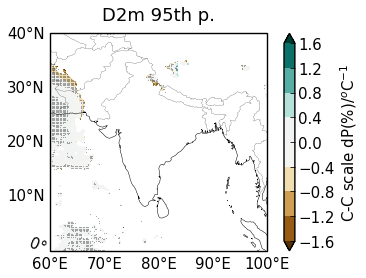

In [65]:
# India T2m 95th
plot_3d(d2m_vimd, d2m_p_vimd, ind, 'D2m 95th p.', threshold_sig=0.01, marker_size=.001, cmap=tmap, levels=11, extend='both')
# plt.savefig('./images/postmon/full95/india_t2m95.pdf', dpi=300)

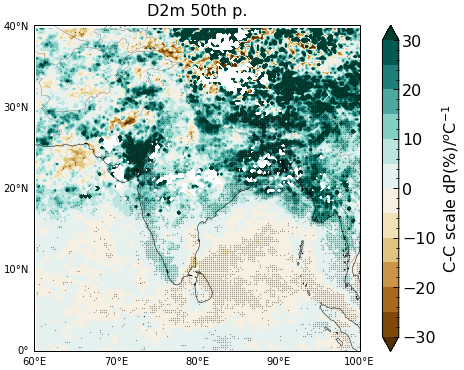

In [19]:
# India D2m 50th
plot_3d(d2m_slope_da50, d2m_p_da50, ind, 'D2m 50th p.', threshold_sig=0.005, marker_size=.02, levels=levels, extend='both')
plt.savefig('./images/postmon/full50/india_d2m50.pdf', dpi=300)

## SIP region

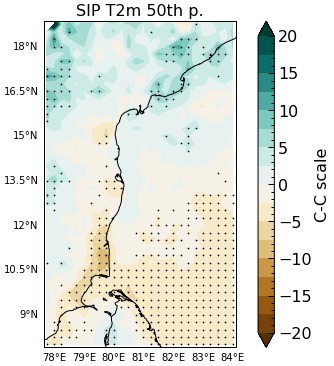

In [27]:
ccplot.plot_3d(t2m_slope_da50.sel(lat =slice(8,19), lon = slice(77.75,84)), t2m_p_da50.sel(lat =slice(8,19), lon = slice(77.75,84)), sip, 'SIP T2m 50th p.', threshold_sig=0.005, marker_size=0.5, levels=levels, extend='both')
plt.savefig('./images/postmon/full50/sip_t2m50.pdf', dpi=300)

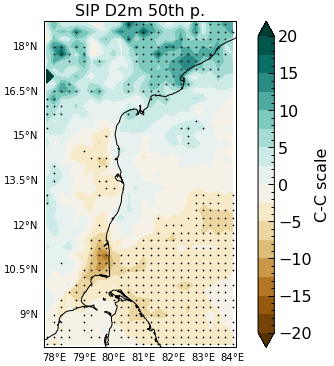

In [28]:
ccplot.plot_3d(d2m_slope_da50.sel(lat =slice(8,19), lon = slice(77.75,84)), d2m_p_da50.sel(lat =slice(8,19), lon = slice(77.75,84)), sip, 'SIP D2m 50th p.', threshold_sig=0.005, marker_size=0.5, levels=levels, extend='both')
plt.savefig('./images/postmon/full50/sip_d2m50.pdf', dpi=300)

## WCWG region

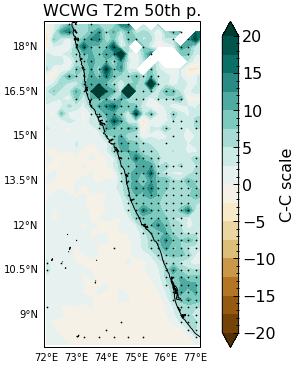

In [30]:
ccplot.plot_3d(t2m_slope_da50.sel(lat =slice(8,18.75), lon = slice(72,77.5)), t2m_p_da50.sel(lat =slice(8,18.75), lon = slice(72,77.5)), wcwg, 'WCWG T2m 50th p.', threshold_sig=0.005, marker_size=0.5, levels=levels, extend='both')
plt.savefig('./images/postmon/full50/wcwg_t2m50.pdf', dpi=300)

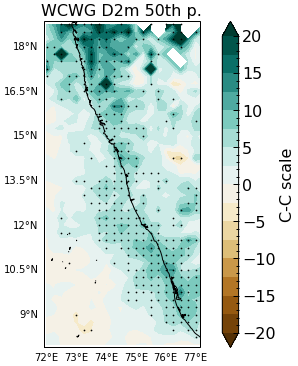

In [32]:
ccplot.plot_3d(d2m_slope_da50.sel(lat =slice(8,18.75), lon = slice(72,77.5)), d2m_p_da50.sel(lat =slice(8,18.75), lon = slice(72,77.5)), wcwg, 'WCWG D2m 50th p.', threshold_sig=0.005, marker_size=0.5, levels=levels, extend='both')
plt.savefig('./images/postmon/full50/wcwg_d2m50.pdf', dpi=300)

## CIR Region

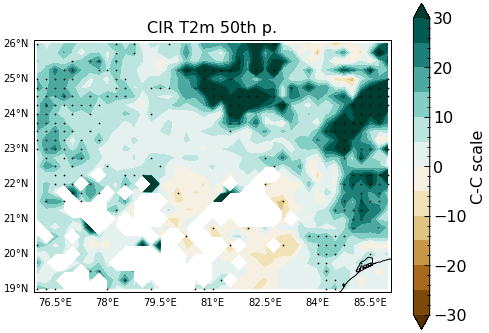

In [36]:
ccplot.plot_3d(t2m_slope_da50.sel(lat =slice(19,26), lon = slice(76,86)), t2m_p_da50.sel(lat =slice(19,26), lon = slice(76,86)), cir, 'CIR T2m 50th p.', threshold_sig=0.005, marker_size=0.5, levels=levels, extend='both')
plt.savefig('./images/postmon/full50/cir_t2m50.pdf', dpi=300)

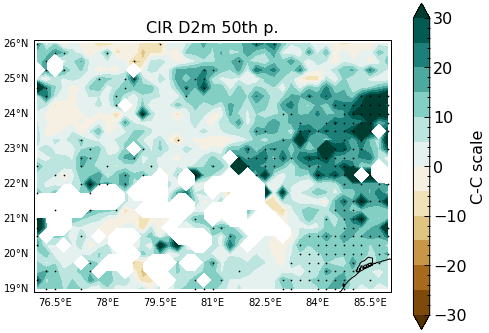

In [38]:
ccplot.plot_3d(d2m_slope_da50.sel(lat =slice(19,26), lon = slice(76,86)), d2m_p_da50.sel(lat =slice(19,26), lon = slice(76,86)), cir, 'CIR D2m 50th p.', threshold_sig=0.005, marker_size=0.5, levels=levels, extend='both')
plt.savefig('./images/postmon/full50/cir_d2m50.pdf', dpi=300)

## One region analysis

In [254]:
# cir -> 17,23; 72,84

In [59]:
from scipy import stats

In [390]:
ind_precip = precip.sel(lat=slice(17,23), lon=slice(72,84)).load()
ind_t2m = t2m.sel(lat=slice(17,23), lon=slice(72,84)).load()

In [391]:
ind_d2m = d2m.sel(lat=slice(17,23),lon=slice(72,84)).load()

In [441]:
p_t2m, mean_t2m = binning.get_binned(ind_precip.mean(dim=['lat', 'lon']), ind_t2m.mean(dim=['lat', 'lon']), percentile_val=0.95, bin_nr=12)

In [442]:
p_d2m, mean_d2m = binning.get_binned(ind_precip.mean(dim=['lat', 'lon']), ind_d2m.mean(dim=['lat', 'lon']), percentile_val=0.95, bin_nr=12)

In [443]:
# p95_d2m, mean_d2m = binning.get_binned_alter(ind_precip.mean(dim=['lat', 'lon']), ind_d2m.mean(dim=['lat', 'lon']), percentile_val=0.95, bin_nr=20)

In [444]:
mean_t2marr = mean_t2m.to_numpy()
p_t2marr = p_t2m.to_numpy()
mean_d2marr = mean_d2m.to_numpy()
p_d2marr = p_d2m.to_numpy()

In [445]:
# for t2m
t2m_ideal, precip1_ideal_t2m, precip2_ideal_t2m = ccplot.get_ideal_data(mean_t2marr, 1.1, 1.1, time_scale=1)
t2m_ideal_2, precip3_ideal_t2m, precip4_ideal_t2m = ccplot.get_ideal_data(mean_t2marr, 0.0001, 1.1, time_scale=2)

In [446]:
# for d2m
d2m_ideal, precip1_ideal_d2m, precip2_ideal_d2m = ccplot.get_ideal_data(mean_d2marr, 0.7, 0.7, time_scale=1)
d2m_ideal_2, precip3_ideal_d2m, precip4_ideal_d2m = ccplot.get_ideal_data(mean_d2marr, 0.0001, 0.7, time_scale=2)

In [434]:
def plot_cc(binned_precip, mean_temp, temparr, preciparr1, preciparr2, preciparr3, preciparr4, fit = True, **kwargs):
    # Make the figure
    if fit == True:
        # get the slope and intercept of the data to be plotted
        slope, intercept, r, _, _ = stats.linregress(mean_temp, np.log(binned_precip))
        # start plotting
        plt.semilogy(mean_temp, binned_precip, **kwargs)
        plt.semilogy(temparr, preciparr1, 'k-', alpha = 0.2)
        # plt.semilogy(temparr, preciparr2, 'k-', alpha = 0.2)
        # plt.semilogy(temparr, preciparr3, 'k--', alpha = 0.2)
        plt.semilogy(temparr, preciparr4, 'k--', alpha = 0.2)
        plt.semilogy(mean_temp, slope*mean_temp + intercept, color = 'k', ls = '-', alpha = 0.8, label = f'C-C scale = {np.round(100*(np.exp(slope) - 1), 3)}; $R^2$ = {np.round(r,3)}')
        plt.xlim(mean_temp.min()-0.01, mean_temp.max()+0.01)
        # plt.yticks([1, 10, 100])
        plt.legend(frameon = False)

    elif fit == False:
        slope, _, r, _, _ = stats.linregress(mean_temp, np.log(binned_precip))
        # start plotting
        plt.semilogy(mean_temp, binned_precip, label = f'C-C scale = {np.round(100*(np.exp(slope) - 1), 3)}; $R^2$ = {np.round(r,3)}', **kwargs)
        plt.semilogy(temparr, preciparr1, 'k-', alpha = 0.2)
        # plt.semilogy(temparr, preciparr2, 'k-', alpha = 0.2)
        # plt.semilogy(temparr, preciparr3, 'k--', alpha = 0.2)
        plt.semilogy(temparr, preciparr4, 'k--', alpha = 0.2)
        plt.xlim(mean_temp.min()-0.01, mean_temp.max()+0.01)
        # plt.yticks([1, 10, 100])
        plt.legend(frameon = False)

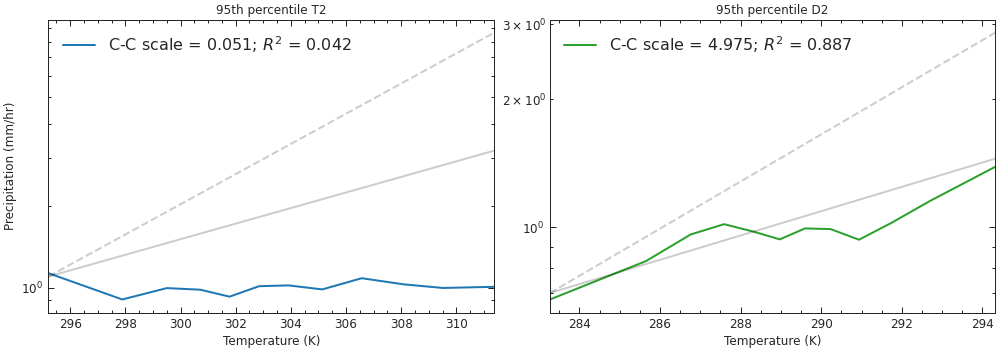

In [447]:
fig = plt.figure(figsize=(14,5))

plt.subplot(121)
plot_cc(p_t2marr, mean_t2marr, t2m_ideal, precip1_ideal_t2m, precip2_ideal_t2m, precip3_ideal_t2m, precip4_ideal_t2m, fit=False, color = 'tab:blue')
plt.ylabel('Precipitation (mm/hr)', fontsize=12)
plt.xlabel('Temperature (K)', fontsize=12)
plt.title('95th percentile T2', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
# plt.minorticks_off()
# plt.ylim(0.2,1.1)
# plt.ylim(0.9,2.4)

# fig.gca().yaxis.set_ticks_position('both')

plt.subplot(122)
plot_cc(p_d2marr, mean_d2marr, d2m_ideal, precip1_ideal_d2m, precip2_ideal_d2m, precip3_ideal_d2m, precip4_ideal_d2m, fit=False, color = 'tab:green')
# plt.ylabel('Precipitation (mm/hr)')
plt.xlabel('Temperature (K)', fontsize=12)
plt.title('95th percentile D2', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
# plt.minorticks_off()
# plt.ylim(0.2,1.1)
# plt.ylim(0.9,2.4)

# fig.gca().yaxis.set_ticks_position('both')
fig.tight_layout()
plt.savefig('./images/premonsoon/cir_new_ccplot_95.pdf', dpi = 300)